In [1]:
# Read in CDFS main data
import pandas as pd

data = pd.read_csv('../DATA/ZFOURGE/CDFS/CDFS_MAIN.csv')
df = pd.DataFrame(data)
df = df[df['Use'] == 1]

df['SNR_IRAC_36'] = df['F3.6'] / df['e_F3.6']
df['SNR_IRAC_45'] = df['F4.5'] / df['e_F4.5']
df['SNR_IRAC_58'] = df['F5.8'] / df['e_F5.8']
df['SNR_IRAC_80'] = df['F8.0'] / df['e_F8.0']
df['SNR_MIPS_24'] = df['F24'] / df['e_F24']

df = df[df['SNR_IRAC_36'] >= 1]
df = df[df['SNR_IRAC_45'] >= 1]
df = df[df['SNR_IRAC_58'] >= 1]
df = df[df['SNR_IRAC_80'] >= 1]
df = df[df['SNR_MIPS_24'] >= 1]

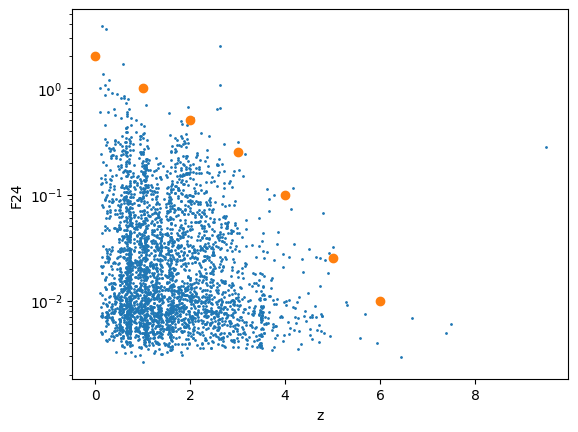

In [2]:
import numpy as np
import matplotlib.pyplot as plt

z = df['zpk']
flux = df['F24']

x = np.array([0, 1, 2, 3, 4, 5, 6])
y = np.array([2, 1, 0.5, 0.25, 0.1, 0.025, 0.01])

plt.scatter(z, flux, s=1)
plt.scatter(x, y)
plt.ylabel('F24')
plt.xlabel('z')
plt.yscale('log')

2.032722118066327
0.669815476347139
-0.03434757837283247


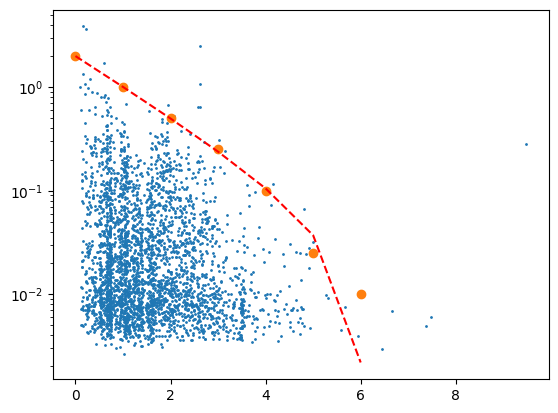

In [3]:
from scipy.optimize import curve_fit

def func(x, a, b, c):
    return a * np.exp(-b * x) + c

params, covars = curve_fit(func, x, y)

for p in params:
    print(p)

plt.scatter(z, flux, s=1, label='Data')
plt.scatter(x, y, label='Model')
plt.plot(x, func(x, *params), label='Fit', linestyle='--', color='red')
plt.yscale('log')
# plt.xlim(0,5)

# y = 2.032 * np.exp(-0.669 * x) -0.034
x = np.log((y + 0.034) / 2.032) / -0.669


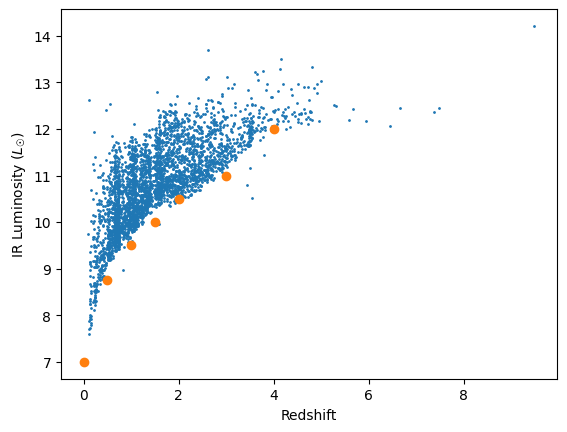

In [13]:
lir = np.log10(df['LIR'])
z = df['zpk']

x = np.array([0, 0.5, 1, 1.5, 2, 3, 4])
y = np.array([7, 8.75, 9.5, 10, 10.5, 11, 12])

plt.scatter(z, lir, s=1, label='Data')
plt.scatter(x, y, label='Model')
plt.xlabel('Redshift')
plt.ylabel('IR Luminosity ($L_{☉}$)')
plt.show()

4.636843107482375
0.5973937148693638
8.0778654521935
0.7117765529495679


C:\Users\n10480129\AppData\Local\Temp\ipykernel_21820\1827276094.py:4: RuntimeWarning: invalid value encountered in log10
  y = a * np.log10(x/d + b) + c


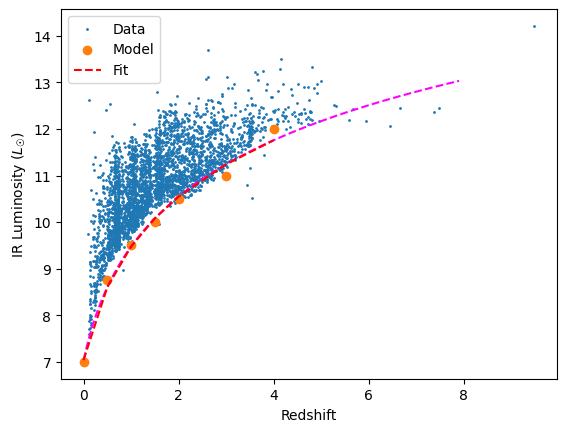

In [14]:
from scipy.optimize import curve_fit

def func(x, a, b, c, d):
    y = a * np.log10(x/d + b) + c 
    return y
    
p0 = [10, 1, 6, 1]

params, covars = curve_fit(func, x, y, p0=p0, maxfev=1000)

for p in params:
    print(p)
    
plt.scatter(z, lir, s=1, label='Data')
plt.scatter(x, y, label='Model')
plt.plot(np.arange(0, 8, 0.1), func(np.arange(0, 8, 0.1), *params), linestyle='--', color='magenta')
plt.plot(x, func(x, *params), label='Fit', linestyle='--', color='red')
plt.xlabel('Redshift')
plt.ylabel('IR Luminosity ($L_{☉}$)')
plt.legend()

# y = 5.336 * np.log10(x/0.652 + 0.768) + 6.586

Text(0, 0.5, 'IR Luminosity ($L_{☉}$)')

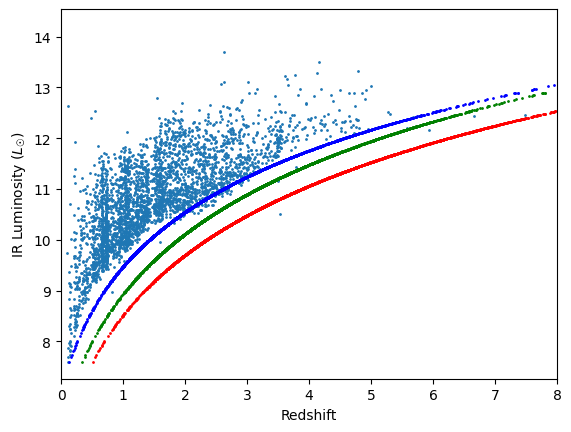

In [15]:
lum = np.log10(df['LIR'])
z = df['zpk']

# max_lum = 5.336 * np.log10(z/0.652 + 0.768) + 6.586
# max_lum3 = 4.636 * np.log10(z/0.711 + 0.597) + 8.077
max_z = 0.652 * (10 ** ((lum - 6.586) / 5.336) - 0.768)
max_z2 = 0.652 * (10 ** ((lum - 7) / 5.336) - 0.768)
max_z3 = 0.711 * (10 ** ((lum - 8.077) / 4.636) - 0.597)

plt.scatter(z, lum, s=1, label='Data')
plt.scatter(max_z, lum, s=1, label='Max Data', color='red')
plt.scatter(max_z2, lum, s=1, label='Max Data 2', color='green')
plt.scatter(max_z3, lum, s=1, label='Max Data 3', color='blue')
plt.xlim(0, 8)
plt.xlabel('Redshift')
plt.ylabel('IR Luminosity ($L_{☉}$)')

992
[2.82179906e+10 2.82179906e+10 2.82179906e+10 2.82179906e+10
 2.82179906e+10 2.82179906e+10 2.82179906e+10 2.82179906e+10
 2.82179906e+10 2.82179906e+10 2.82179906e+10 2.82179906e+10
 2.82179906e+10 2.82179906e+10 2.82179906e+10 2.82179906e+10
 2.82179906e+10 1.95703730e+10 1.18407592e+10 7.16407289e+09
 4.33451433e+09 2.62253256e+09 1.58672380e+09 9.60023319e+08
 5.80847640e+08 3.51433110e+08 2.12629306e+08 1.28648157e+08
 7.78366283e+07 4.70938788e+07]
3.07e+08


C:\Users\danie\AppData\Local\Temp\ipykernel_428\3095397170.py:60: RuntimeWarning: divide by zero encountered in log10
  phi = np.log10(counts / volume)
C:\Users\danie\AppData\Local\Temp\ipykernel_428\3095397170.py:60: RuntimeWarning: invalid value encountered in log10
  phi = np.log10(counts / volume)


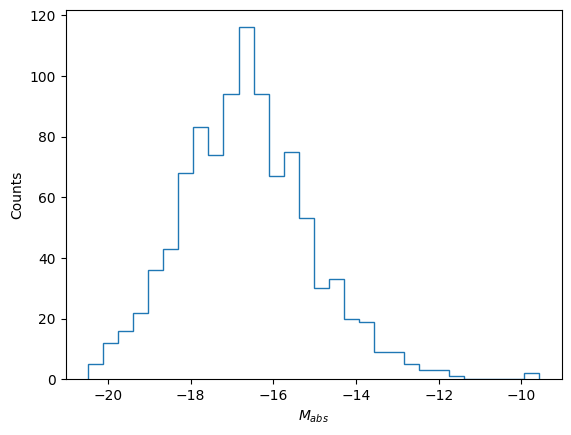

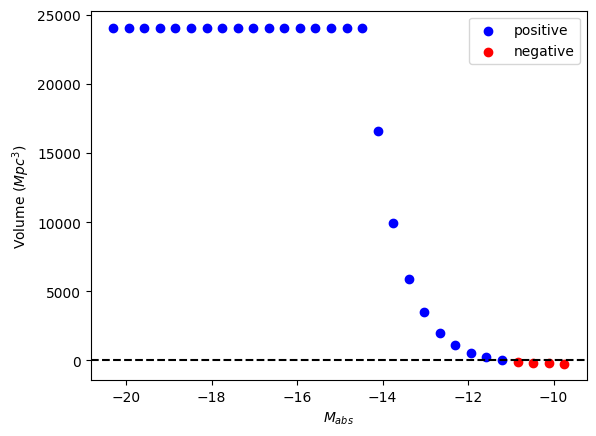

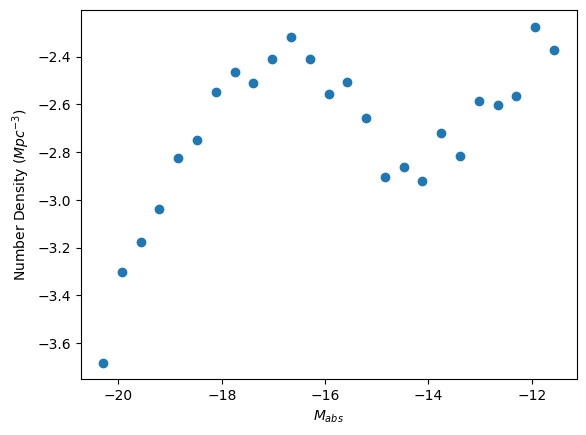

In [1]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from astropy.cosmology import FlatLambdaCDM

# Variables
z_start = 0.1
z_end = 0.5
mlim = 27 # AB magnitude? Apparent magnitude?
n_lum_bins = 30
survey_area = 0.03556 # deg^2

# Read in CDFS main data
data = pd.read_csv('../DATA/ZFOURGE/CDFS/CDFS_MAIN.csv')
df = pd.DataFrame(data)
df = df[df['Use'] == 1] # 13,299
df = df[df['FKs'] > 0] # 12,676
df = df[df['FKs'] <= mlim] # 11,902
df = df[(df['zpk'] >= z_start) & (df['zpk'] < z_end)]
print(len(df))

# Data
z = df['zpk']
m_app = df['FKs'] # apparent magnitude

# Calculate distances
cosmo = FlatLambdaCDM(H0=70, Om0=0.3)
dists = cosmo.luminosity_distance(z) # Mpc
dists *= 10 ** 6 # Mpc -> pc

# Calculate absolute magnitude
m_ab = 25 - 2.5*np.log10(m_app) # apparent magnitude -> AB magnitude
M_abs = m_ab - 5 * np.log10(dists / 10) # AB magnitude -> absolute magnitude

# Make a histogram
counts, lum_bin_edges = np.histogram(M_abs, bins=n_lum_bins)
lum_bin_centers = lum_bin_edges[0:-1] + (np.diff(lum_bin_edges)[0] / 2) # Absolute magnitude bin centers

# Calculate min and max possible distances
dmin = cosmo.luminosity_distance(z_start).value # Mpc
dmax = cosmo.luminosity_distance(z_end).value # Mpc

# Calculate max distance for each bin
dmaxs = (10 * 10 ** ((mlim - lum_bin_centers) / 5)) # pc
dmaxs = dmaxs / 10 ** 6 # pc -> Mpc

# Mask distances greater than dmax
dmaxs[dmaxs > dmax] = dmax
# dmaxs[dmaxs < dmin] = dmin

# Calculate volume
vmaxs = (4/3) * np.pi * (dmaxs ** 3)
vmin = (4/3) * np.pi * (dmin ** 3)
volume = (vmaxs - vmin) * (survey_area / 41253)
print(vmaxs)
print("{:.2e}".format(vmin))

# Luminosity function
phi = np.log10(counts / volume)

plt.hist(M_abs, bins=n_lum_bins, histtype='step')
plt.xlabel('$M_{abs}$')
plt.ylabel('Counts')
plt.show()

pos_mask = volume >= 0
neg_mask = volume < 0
plt.scatter(lum_bin_centers[pos_mask], volume[pos_mask], color='blue', label='positive')
plt.scatter(lum_bin_centers[neg_mask], volume[neg_mask], color='red', label='negative')
plt.xlabel('$M_{abs}$')
plt.ylabel('Volume $(Mpc^3)$')
plt.axhline(0, color='black', linestyle='--')
plt.legend()
plt.show()

plt.scatter(lum_bin_centers, phi)
plt.xlabel('$M_{abs}$')
plt.ylabel('Number Density $(Mpc^{-3})$')
plt.show()